<a href="https://colab.research.google.com/github/ErikaDenisse29/ColabFiles/blob/main/Actividad_8_Visualizaci%C3%B3n_sem%C3%A1ntica_de_palabras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 8: Visualización semántica de palabras utilizando embeddings y t-SNE.**

---


**Objetivo de la actividad.**

Aplicar técnicas de representación vectorial de palabras (embeddings) y de reducción de dimensionalidad (t-SNE) para generar una visualización semántica que permita identificar relaciones, similitudes y agrupamientos entre términos.


---
**Instrucciones**

Explora la representación semántica de palabras e identifica los diferentes ominios temáticos contenidos en el conjunto de datos proporcionado mediante la visualización 2D de embeddings de palabras. Realiza y define las actividades de preprocesamiento del texto (si lo crees necesario) para que fácilmente puedas identificar en la visualización lo siguiente:

**¿Cuántos dominios o grupos de datos puedes identificar visualmente en la gráfica?**

*Puedo identificar tres grupos principales de palabras*

**¿Cuáles son esos dominios?**

Basándome en el agrupamiento visual y el significado semántico de las palabras los dominios puedo describirlos como:

•	Aduana/Frontera: Este dominio incluye palabras como aduanera, declaraciones, nacional, país, partida, origen, fiscal, arancelarias, cumplimiento, contrabando, embarque, transporte. Estas palabras están todas relacionadas con procedimientos aduaneros, regulaciones y actividades fronterizas.

•	Inspección/Verificación: Este dominio incluye palabras como verificación, aplica revisión, contenedor, inspecciones comerciales, regulaciones, tránsito, temporal, destino." Estas palabras están relacionadas con el proceso de revisión y verificación de bienes o documentos.

•	Comercio: Este dominio incluye palabras como exportación, internacional, certificado, impuestos, reglas, importación, mercancía, despacho, costo, valor, flete." Estas palabras están relacionadas con la compra, venta y movimiento de bienes a través de fronteras, incluyendo costos y documentación asociados.



INICIANDO ENTRENAMIENTO DE EMBEDDINGS
Tamaño del corpus: 118 documentos
Total de tokens: 806
Entrenando modelo Word2Vec...
Entrenando modelo FastText...

EVALUACIÓN DE MODELOS:
Similitudes Word2Vec:
  arancel o impuesto no en vocabulario
  importación - exportación: 0.301
  factura - comercial: 0.144
  aduana o frontera no en vocabulario

Similitudes FastText:
  arancel - impuesto: 0.940
  importación - exportación: 0.998
  factura - comercial: 0.846
  aduana - frontera: 0.873

Palabras más similares a 'aduana' (Word2Vec):
  compensatorias: 0.668
  inferiores: 0.661
  protegen: 0.650
  mercancías: 0.643
  mercancía: 0.635
Modelos guardados exitosamente!
Word2Vec: word2vec_es.model
FastText: fasttext_es.model

ESTADÍSTICAS FINALES:
Tamaño vocabulario Word2Vec: 152
Tamaño vocabulario FastText: 152

Generando visualizaciones...


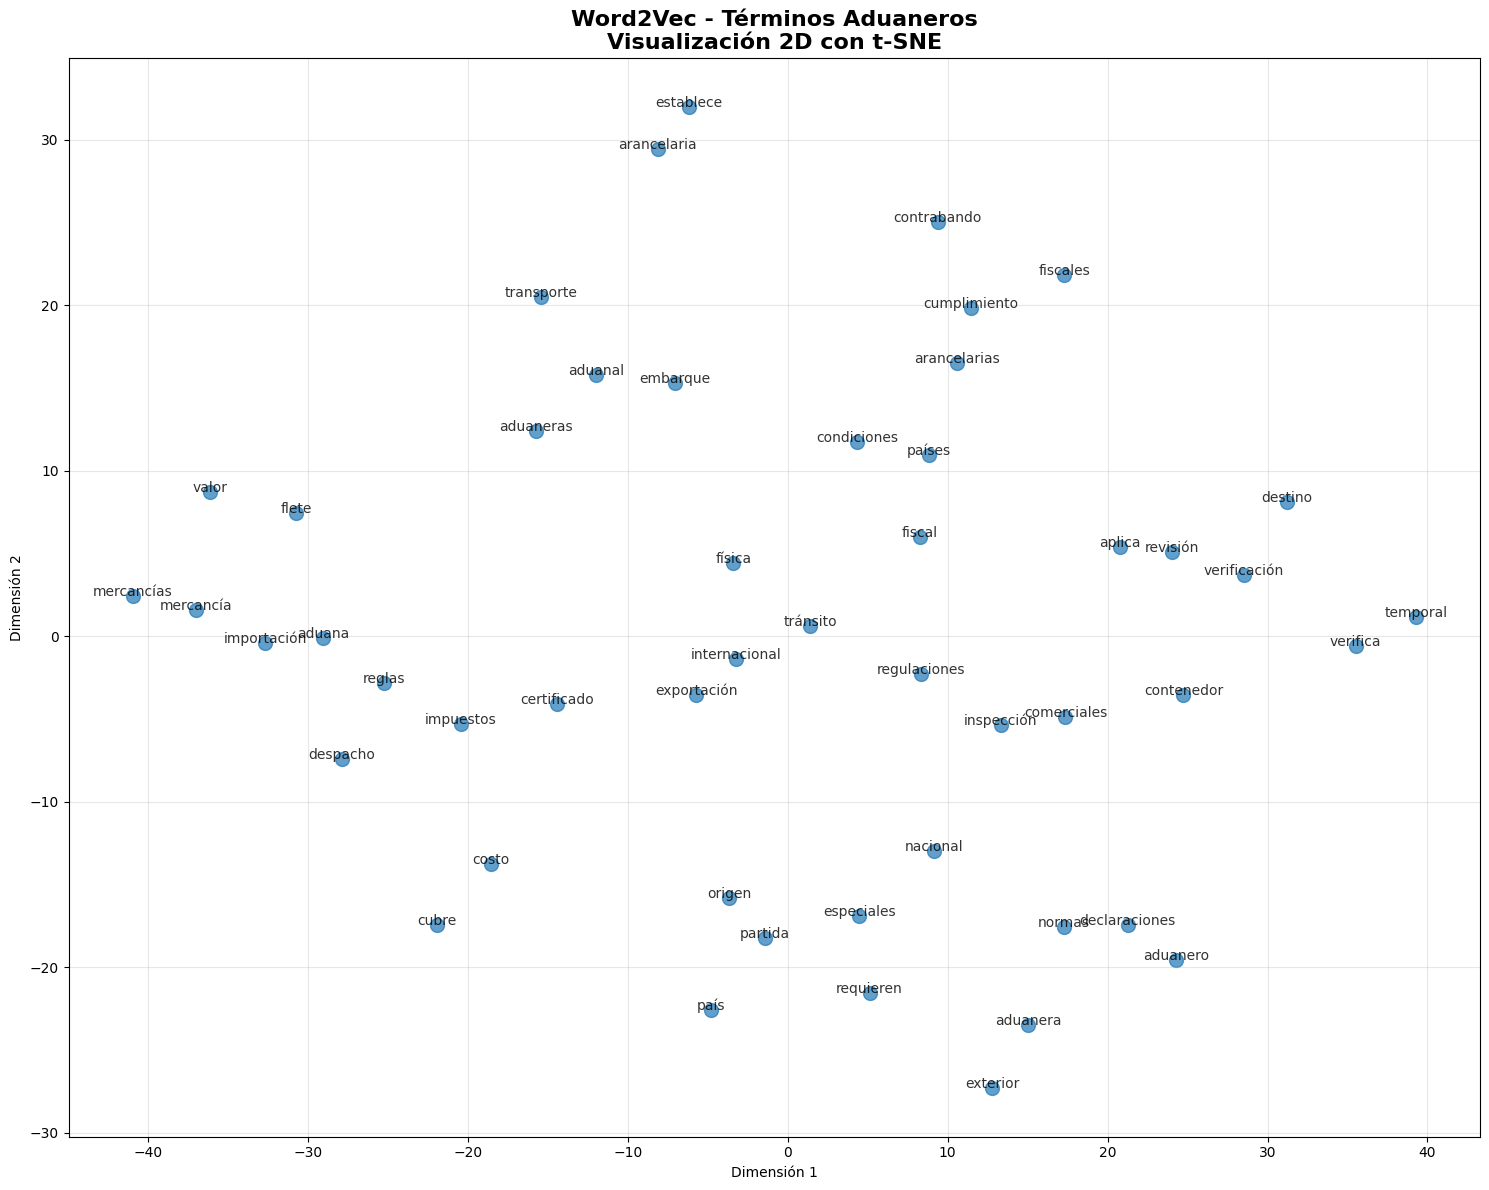


Ejemplo de embedding para 'aduana':
Vector: [ 0.00150525  0.00349373 -0.00338717  0.00774157  0.0092845 ]...
Dimensionalidad: 100


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import random
import re
from gensim.models import Word2Vec, FastText

def preprocesar_texto_simple(texto):

    texto = texto.lower()
    texto = re.sub(r'[^a-záéíóúñü0-9\s]', ' ', texto)
    tokens = texto.split()

    stop_words = {
        'de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para',
        'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o',
        'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también','permite','asegura'
    }


    palabras_tecnicas = {
'cif'	,'fob', 'iva'	,'dai'	,
'exportación'	, 	'mercancía'	, 	'pedimento'	, 	'despacho'	,
'tributo'	, 	'derecho'	, 	'tasa'	, 	'comercial'	,
'declaración'	, 	'jurada'	, 	'manifiesto'	, 	'control'	,
'contrabando'	, 	'decomiso'	, 	'incautación'	, 	'muestra'	,
'carga'	, 	'contenedor'	, 	'container'	, 	'pallet'	,
'naviera'	, 	'aerolínea'	, 	'agente'	, 	'aduanero'	,
'frontera'	, 	'puerto'	, 	'zona'	, 	'franco'	,
'retención'	, 	'perfeccionamiento'	, 	'tránsito', 	'inspección'
'factura'	, 	'comercial'	, 	'conocimiento'	, 	'embarque'	,
'certificado'	, 	'origen'	, 	'declaración'	,  'manifiesto'	,
'arancel'	, 	'impuesto'	, 	'gravamen', 	'tarifa'	,
'derecho'	, 	'tasa'	,  	'IVA'	, 	'IEPS',
'despacho'	, 	'importación'	, 	'exportación'	, 	'tránsito',
'depósito'	,  	'liberación'	, 	'retención'
'inspección'	, 	'control'	, 	'revisión'	, 	'fiscalización'	,
'decomiso'	,	'mercancía'	, 	'mercadería'	, 	'contenedor	'
'transportista'	,  	'aduana'	, 	'agente'	, 	'aduanero'	,
'consignatario'	, 	'frontera'	, 	'puerto'
'factura'	, 	'comercial'	, 	'conocimiento'	, 	'embarque'	,
'list'	, 	'certificado'	, 	'origen'	, 	'declaración'	,
'derecho'	, 	'tasa'	, 	'dai'	, 	'iva'	,
'depósito'	, 'liberación'	, 	'retención'	,
'carga'	, 	'mercancía'	, 	'mercadería',	'aduana'




    }

    tokens = [token for token in tokens if token not in stop_words or token in palabras_tecnicas]

    return tokens

def preparar_corpus_aduana():
    textos_aduana = [

        "El pedimento aduanal es el documento fundamental para el despacho de mercancías en aduana",
        "La factura comercial debe incluir descripción detallada valor y términos de entrega de la mercancía",
        "El conocimiento de embarque BL sirve como contrato de transporte y título de propiedad",
        "El certificado de origen determina el país de fabricación para aplicación de tratados comerciales",
        "El packing list detalla el contenido peso y dimensiones de cada bulto en el embarque",
        "La póliza de seguro cubre riesgos durante el transporte internacional de mercancías",
        "El manifiesto de carga declara todas las mercancías transportadas en un vehículo o contenedor",
        "La declaración de valor aduanero establece el base para cálculo de impuestos de importación",
        "El despacho aduanero comprende la presentación examen y liberación de mercancías",
        "La importación definitiva implica el pago de impuestos y nacionalización de mercancías",
        "La exportación definitiva requiere documentación que acredite el destino final",
        "El régimen de tránsito aduanero permite el movimiento de mercancías bajo control fiscal",
        "El depósito fiscal autoriza el almacenamiento temporal sin pago inmediato de impuestos",
        "La recinto fiscalizado son áreas controladas por autoridades aduaneras para almacenamiento",
        "El Drawback permite recuperar impuestos pagados en importación cuando se reexporta",
        "El impuesto general de importación IGI se calcula sobre el valor en aduana",
        "El IVA aplica sobre el valor de mercancía más impuestos de importación",
        "Los derechos antidumping compensan importaciones a precios inferiores al valor normal",
        "Las cuotas compensatorias protegen contra subsidios en país de origen",
        "La tasa por servicios aduanales cubre los costos de procesamiento del despacho",
        "El valor CIF incluye costo seguro y flete hasta puerto de destino",
        "El valor FOB considera la mercancía puesta a bordo del medio de transporte",
        "El impuesto general de importación IGI se calcula sobre el valor en aduana",
        "El IVA aplica sobre el valor de mercancía más impuestos de importación",
        "Los derechos antidumping compensan importaciones a precios inferiores al valor normal",
        "Las cuotas compensatorias protegen contra subsidios en país de origen",
        "La tasa por servicios aduanales cubre los costos de procesamiento del despacho",
        "El valor CIF incluye costo, seguro y flete hasta puerto de destino",
        "El valor FOB considera la mercancía puesta a bordo del medio de transporte",
        "La fracción arancelaria clasifica mercancías para determinar impuestos aplicables",
        "Los tratados comerciales establecen preferencias arancelarias entre países miembros",
        "La cláusula de nación más favorecida otorga igualdad de condiciones comerciales",
        "La NANDINA es la nomenclatura arancelaria de países de la ALADI",
        "La TIGIE contiene la tarifa de impuestos de importación y exportación de México",
        "La partida arancelaria consta de 6 dígitos según sistema armonizado",
        "La subpartida nacional amplía a 8 dígitos para mayor especificidad",
        "Las notas explicativas ayudan a interpretar correctamente las partidas arancelarias",
        "Las reglas generales de interpretación guían la clasificación arancelaria",
        "El dictamen de clasificación arancelaria emite criterios técnicos oficiales",
        "La mercancía genérica se clasifica en la partida que comprenda especies similares",
        "Los conjuntos se clasifican según la partida de su componente principal",
        "La inspección no intrusiva utiliza escáneres para revisión de mercancías",
        "El muestreo aleatorio selecciona embarques para verificación documental o física",
        "La revisión física examina manualmente el contenido de los embarques",
        "El operativo aduanero detecta y previene ilícitos fiscales y contrabando",
        "La alerta roja detiene mercancías con indicios de irregularidad o riesgo",
        "El decomiso administrativo priva de mercancías que infringen regulaciones",
        "La incautación asegura mercancías presuntamente ilegales durante investigación",
        "El contrabando técnico omite declaraciones parciales o altera valores",
        "El contrabando absoluto introduce mercancías prohibidas o restringidas",
        "La auditoría aduanera verifica el cumplimiento posterior al despacho",
        "El contenedor multimodal facilita el transporte intermodal de mercancías",
        "El pallet estandariza la unidad de carga para manipulación eficiente",
        "La naviera opera buques para transporte marítimo de contenedores",
        "El agente de carga coordina el transporte puerta a puerta internacional",
        "El flete marítimo cubre el costo de transporte por vía marítima",
        "El flete aéreo tiene mayores costos pero menores tiempos de tránsito",
        "La consolidación agrupa cargas de múltiples exportadores en un contenedor",
        "El tracking monitoriza la ubicación de mercancías en tiempo real",
        "El agente aduanal representa ante aduana a importadores y exportadores",
        "El apoderado aduanal actúa con facultades legales para operaciones aduaneras",
        "La autoridad aduanera ejerce facultades de verificación y fiscalización",
        "La Ley Aduanera establece el marco jurídico de operaciones de comercio exterior",
        "Las Reglas de Comercio Exterior detallan procedimientos y requisitos",
        "El Código Fiscal de la Federación regula aspectos tributarios de importación",
        "La Secretaría de Economía emite regulaciones no arancelarias",
        "La Ventanilla Única integra trámites de múltiples dependencias gubernamentales",
        "El OEA Operador Económico Autorizado obtiene beneficios por cumplimiento certificado",
        "El T-MEC establece reglas de origen para comercio en América del Norte",
        "Las mercancías peligrosas requieren declaración especial y embalaje certificado",
        "Las mercancías estratégicas tienen controles por seguridad nacional",
        "Los productos farmacéuticos requieren registros sanitarios y permisos especiales",
        "Los equipos usados necesitan certificados de inspección y cumplimiento de normas",
        "Las muestras sin valor comercial pueden acogerse a regímenes especiales",
        "Los bienes de capital califican para programas de promoción industrial",
        "Las mercancías restringidas requieren permisos previos de dependencias competentes",
        "Los productos sujetos a normas oficiales deben demostrar cumplimiento",
        "Las mercancías de alto valor tienen procedimientos especiales de valuación",
        "La importación temporal permite entrada de mercancías para reexportación",
        "La exportación temporal autoriza salida temporal para reparación o exhibición",
        "El recinto fiscalizado estratégico almacena mercancías con beneficios fiscales",
        "La maquila transforma mercancías importadas temporalmente para exportación",
        "El programa sectorial promueve industrias específicas con beneficios arancelarios",
        "La reparación y reembarque corrige defectos de mercancías en tránsito",
        "El abandono legal transfiere mercancías al fisco por falta de despacho",
        "La donación aduanera asigna mercancías abandonadas a instituciones de beneficencia",
        "La destrucción controlada elimina mercancías prohibidas o peligrosas",
        "La reexportación devuelve mercancías al exterior después de importación temporal",
        "La ventanilla digital permite trámites electrónicos las 24 horas",
        "El pedimento electrónico agiliza el proceso de despacho aduanero",
        "La firma electrónica avanzada autentica documentos digitales",
        "El sistema de selección automatizada asigna canales de revisión",
        "La inteligencia artificial detecta patrones de riesgo en declaraciones",
        "El blockchain asegura trazabilidad en cadena de suministro internacional",
        "El internet de las cosas monitoriza condiciones de transporte en tiempo real",
        "La nube digital almacena documentación para acceso desde cualquier ubicación",
        "La ventanilla única integra trámites de múltiples dependencias gubernamentales",
        "La factura electrónica CFDI cumple con requisitos fiscales digitales",
        "El auditor aduanero verifica el correcto cumplimiento de obligaciones",
        "La visita de verificación física revisa instalaciones y mercancías",
        "El ejercicio de comprobación valida valores declarados en pedimentos",
        "La promoción de recursos impugna resoluciones de autoridad aduanera",
        "El criterio de regularización corrige omisiones en declaraciones anteriores",
        "La presunción de contrabando aplica ante ocultamiento o falsificación",
        "La multa administrativa sanciona infracciones a regulaciones aduaneras",
        "La prisión preventiva puede aplicarse en casos de delitos fiscales graves",
        "El perdón administrativo extingue responsabilidades en ciertas condiciones",
        "La prescripción limita el tiempo para ejercer acción fiscalizadora",
        "El certificado de origen preferencial accede a tratados comerciales",
        "La cláusula de salvaguarda protege industria nacional ante importaciones masivas",
        "El arancel cuota establece volumen libre de impuestos con tope máximo",
        "El país de origen determina preferencias arancelarias y restricciones",
        "El certificado phytosanitario asegura cumplimiento de normas agrícolas",
        "La inspección previa a embarque verifica mercancías en país de origen",
        "El carnet ATA facilita importación temporal para ferias y exposiciones",
        "El acuerdo de reconocimiento mutuo simplifica certificaciones entre países",
        "La cooperación aduanera internacional combate fraudes transfronterizos",
        "La asistencia técnica fortalece capacidades de administraciones aduaneras"

    ]

    return textos_aduana

def entrenar_modelos_embeddings():

    textos = preparar_corpus_aduana()
    corpus_preprocesado = [preprocesar_texto_simple(texto) for texto in textos]

    print(f"Tamaño del corpus: {len(corpus_preprocesado)} documentos")
    print(f"Total de tokens: {sum(len(doc) for doc in corpus_preprocesado)}")

    config_w2v = {
        'vector_size': 100,
        'window': 5,
        'min_count': 2,
        'workers': 4,
        'sg': 1,
        'epochs': 30
    }

    config_ft = {
        'vector_size': 100,
        'window': 5,
        'min_count': 2,
        'workers': 4,
        'sg': 1,
        'epochs': 30,
        'min_n': 3,
        'max_n': 6
    }

    print("Entrenando modelo Word2Vec...")
    model_w2v = Word2Vec(
        sentences=corpus_preprocesado,
        **config_w2v
    )

    print("Entrenando modelo FastText...")
    model_ft = FastText(
        sentences=corpus_preprocesado,
        **config_ft
    )

    return model_w2v, model_ft

def evaluar_modelos(model_w2v, model_ft):

    print("\nEVALUACIÓN DE MODELOS:")
    print("=" * 50)

    palabras_prueba = [
        ('arancel', 'impuesto'),
        ('importación', 'exportación'),
        ('factura', 'comercial'),
        ('aduana', 'frontera')
    ]

    print("Similitudes Word2Vec:")
    for palabra1, palabra2 in palabras_prueba:
        try:
            similitud = model_w2v.wv.similarity(palabra1, palabra2)
            print(f"  {palabra1} - {palabra2}: {similitud:.3f}")
        except:
            print(f"  {palabra1} o {palabra2} no en vocabulario")

    print("\nSimilitudes FastText:")
    for palabra1, palabra2 in palabras_prueba:
        try:
            similitud = model_ft.wv.similarity(palabra1, palabra2)
            print(f"  {palabra1} - {palabra2}: {similitud:.3f}")
        except:
            print(f"  {palabra1} o {palabra2} no en vocabulario")


    print("\nPalabras más similares a 'aduana' (Word2Vec):")
    try:
        similares = model_w2v.wv.most_similar('aduana', topn=5)
        for palabra, similitud in similares:
            print(f"  {palabra}: {similitud:.3f}")
    except:
        print("  'aduana' no encontrada en vocabulario")

def guardar_modelos(model_w2v, model_ft):
    model_w2v.save("word2vec_es.model")
    model_ft.save("fasttext_es.model")
    print("Modelos guardados exitosamente!")
    print("Word2Vec: word2vec_es.model")
    print("FastText: fasttext_es.model")

def cargar_modelos():
    try:
        model_w2v = Word2Vec.load("word2vec_es.model")
        model_ft = FastText.load("fasttext_es.model")
        print("Modelos cargados exitosamente!")
        return model_w2v, model_ft
    except Exception as e:
        print(f"Error al cargar modelos: {e}")
        return None, None

def generar_grafica_embeddings(model, titulo="Embeddings de Términos Aduaneros"):


    palabras = list(model.wv.key_to_index.keys())[:50]
    vectores = np.array([model.wv[palabra] for palabra in palabras])


    tsne = TSNE(n_components=2, random_state=42, perplexity=5)
    vectores_2d = tsne.fit_transform(vectores)


    plt.figure(figsize=(15, 12))
    plt.scatter(vectores_2d[:, 0], vectores_2d[:, 1], alpha=0.7, s=100)

    for i, palabra in enumerate(palabras):
        plt.annotate(palabra, (vectores_2d[i, 0], vectores_2d[i, 1]),
                    fontsize=10, alpha=0.8, ha='center')

    plt.title(f'{titulo}\nVisualización 2D con t-SNE', fontsize=16, fontweight='bold')
    plt.xlabel('Dimensión 1')
    plt.ylabel('Dimensión 2')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('embeddings_visualization.png', dpi=300, bbox_inches='tight')
    plt.show()

def main_entrenamiento():
    """Función principal de entrenamiento"""
    print("INICIANDO ENTRENAMIENTO DE EMBEDDINGS")
    print("=" * 50)


    model_w2v, model_ft = entrenar_modelos_embeddings()
    evaluar_modelos(model_w2v, model_ft)
    guardar_modelos(model_w2v, model_ft)


    print("\nESTADÍSTICAS FINALES:")
    print(f"Tamaño vocabulario Word2Vec: {len(model_w2v.wv.key_to_index)}")
    print(f"Tamaño vocabulario FastText: {len(model_ft.wv.key_to_index)}")


    print("\nGenerando visualizaciones...")
    generar_grafica_embeddings(model_w2v, "Word2Vec - Términos Aduaneros")


    print("\nEjemplo de embedding para 'aduana':")
    try:
        embedding_aduana = model_w2v.wv['aduana']
        print(f"Vector: {embedding_aduana[:5]}...")  # Mostrar primeros 5 valores
        print(f"Dimensionalidad: {len(embedding_aduana)}")
    except:
        print("Palabra 'aduana' no encontrada en vocabulario")

# Ejecutar el entrenamiento
if __name__ == "__main__":
    main_entrenamiento()